In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from datetime import date

In [38]:
df = pd.read_csv('data/data.csv')

# Calculate 5 days moving average
df['sma_5'] = df.iloc[:,0].rolling(window=5).mean()
df['sma_14'] = df.iloc[:,0].rolling(window=14).mean()
df['sma_21'] = df.iloc[:,0].rolling(window=21).mean()

# df['date'] = pd.to_datetime(df['date'])

# Filter from lockdown 1.0 , i.e. 25 March
mask = (df['date'] >= '2020-03-25') # & (df['date'] < '2020-05-17')
df = df.loc[mask]
df.tail()

,dailyconfirmed,dailydeceased,dailyrecovered,date,totalconfirmed,totaldeceased,totalrecovered,sma_5,sma_14,sma_21
113,6536,142,3280,2020-05-22,124759,3725,51833,5812.2,4647.785714,4166.523810
114,6665,142,2576,2020-05-23,131422,3867,54409,6219.6,4897.071429,4361.809524
115,7111,156,3285,2020-05-24,138535,4023,57694,6411.0,5097.071429,4559.857143
116,6414,150,3012,2020-05-25,144949,4173,60706,6549.8,5298.642857,4691.190476
117,5838,170,3571,2020-05-26,150787,4343,64277,6512.8,5461.214286,4827.714286


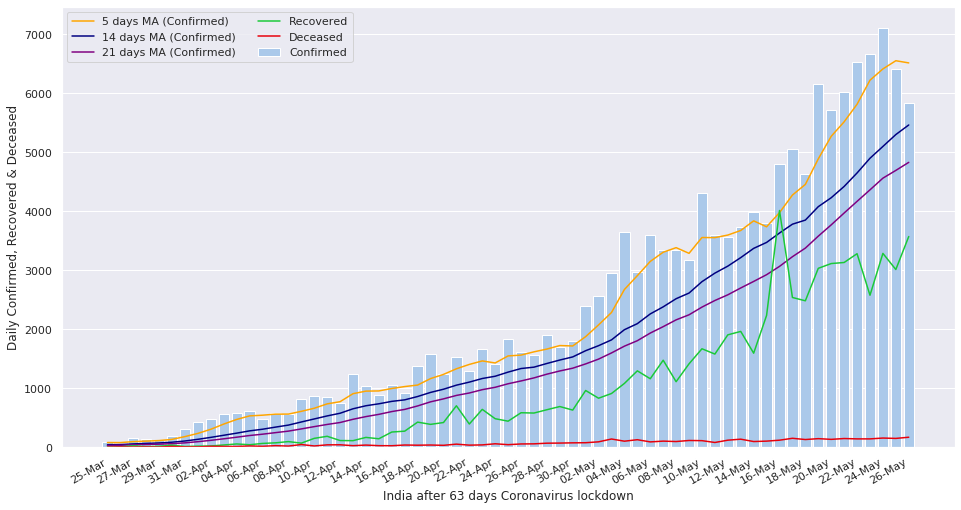

In [39]:
################################
# Daily plot

# Initialize the matplotlib figure
fig, axs = plt.subplots(figsize=(16, 9))

sns.set(style="darkgrid")

sns.set_color_codes("pastel")
sns.barplot(x=df.date, y=df.dailyconfirmed, color='b', label='Confirmed')

# Plot moving averages
sns.lineplot(x=df.date, y=df.sma_5, color='orange', label='5 days MA (Confirmed)')
sns.lineplot(x=df.date, y=df.sma_14, color='navy', label='14 days MA (Confirmed)')
sns.lineplot(x=df.date, y=df.sma_21, color='purple', label='21 days MA (Confirmed)')

sns.set_color_codes("bright")
sns.lineplot(x=df.date, y=df.dailyrecovered, color='g', label='Recovered')
sns.lineplot(x=df.date, y=df.dailydeceased, color='r', label='Deceased')

# handles,labels = axs.get_legend_handles_labels()
# handles = [handles[0], handles[1], handles[2], handles[3]]
# labels = [labels[0], labels[1], labels[2], labels[3]]

# set the frequency for labelling the xaxis
freq = int(2)

# set the xlabels as the datetime data for the given labelling frequency,
# also use only the date for the label

dt = df.iloc[::freq].date
dt = pd.to_datetime(dt).dt.strftime('%d-%b')
axs.set_xticklabels(dt)

# set the xticks at the same frequency as the xlabels
xtix = axs.get_xticks()
axs.set_xticks(xtix[::freq])

# nicer label format for dates
fig.autofmt_xdate()

# Add a legend and informative axis label
axs.legend(ncol=2, frameon=True, loc='upper left')
axs.set(ylabel="Daily Confirmed, Recovered & Deceased", xlabel= "India after " + str(len(df.index)) + " days Coronavirus lockdown")

plt.show()
fig.savefig('asset/daily.png')

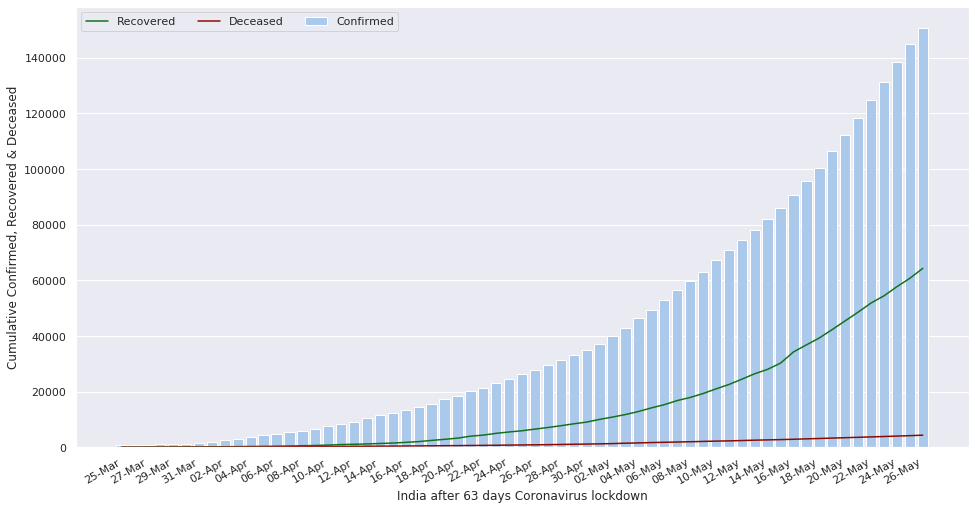

In [40]:
###############################
# Cumulative plot

# Initialize the matplotlib figure
fig, axs = plt.subplots(figsize=(16, 9))

sns.set_color_codes("pastel")
sns.barplot(x=df.date, y=df.totalconfirmed, color='b', label='Confirmed')
sns.set_color_codes("dark")
sns.lineplot(x=df.date, y=df.totalrecovered, color='g', label='Recovered')
sns.lineplot(x=df.date, y=df.totaldeceased, color='r', label='Deceased')

# set the frequency for labelling the xaxis
freq = int(2)

# set the xlabels as the datetime data for the given labelling frequency,
# also use only the date for the label

dt = df.iloc[::freq].date
dt = pd.to_datetime(dt).dt.strftime('%d-%b')
axs.set_xticklabels(dt)

# set the xticks at the same frequency as the xlabels
xtix = axs.get_xticks()
axs.set_xticks(xtix[::freq])

fig.autofmt_xdate()

# Add a legend and informative axis label
axs.legend(ncol=3, frameon=True)
axs.set(ylabel="Cumulative Confirmed, Recovered & Deceased", xlabel= "India after " + str(len(df.index)) + " days Coronavirus lockdown")

plt.show()
fig.savefig('asset/total.png')

In [41]:
###############################3
# Testing plot

# load data
df_tested = pd.read_csv('data/tested.csv')
df_tested['updatetimestamp'] = pd.to_datetime(df_tested['updatetimestamp'], dayfirst=True) #.format('%Y-%m-%d')
df_tested['daily_tested'] = df_tested['totalsamplestested'] - df_tested['totalsamplestested'].shift()

df_tested.tail(5)


,individualstestedperconfirmedcase,positivecasesfromsamplesreported,samplereportedtoday,source,testpositivityrate,testsconductedbyprivatelabs,testsperconfirmedcase,testspermillion,totalindividualstested,totalpositivecases,totalsamplestested,updatetimestamp,daily_tested
73,NaN,NaN,103514,https://t.me/Covid19india_Auxiliary_Test_Data/99,NaN,NaN,NaN,NaN,NaN,NaN,2719434.0,2020-05-22 09:00:00,103514.0
74,NaN,NaN,115364,https://t.me/Covid19india_Auxiliary_Test_Data/110,NaN,NaN,NaN,NaN,NaN,NaN,2834798.0,2020-05-23 09:00:00,115364.0
75,NaN,NaN,108623,https://t.me/Covid19india_Auxiliary_Test_Data/129,NaN,NaN,NaN,NaN,NaN,NaN,2943421.0,2020-05-24 09:00:00,108623.0
76,NaN,NaN,90170,https://t.me/Covid19india_Auxiliary_Test_Data/146,NaN,NaN,NaN,NaN,NaN,NaN,3033591.0,2020-05-25 09:00:00,90170.0
77,NaN,NaN,92528,https://t.me/Covid19india_Auxiliary_Test_Data/160,NaN,NaN,NaN,NaN,NaN,NaN,3126119.0,2020-05-26 09:00:00,92528.0


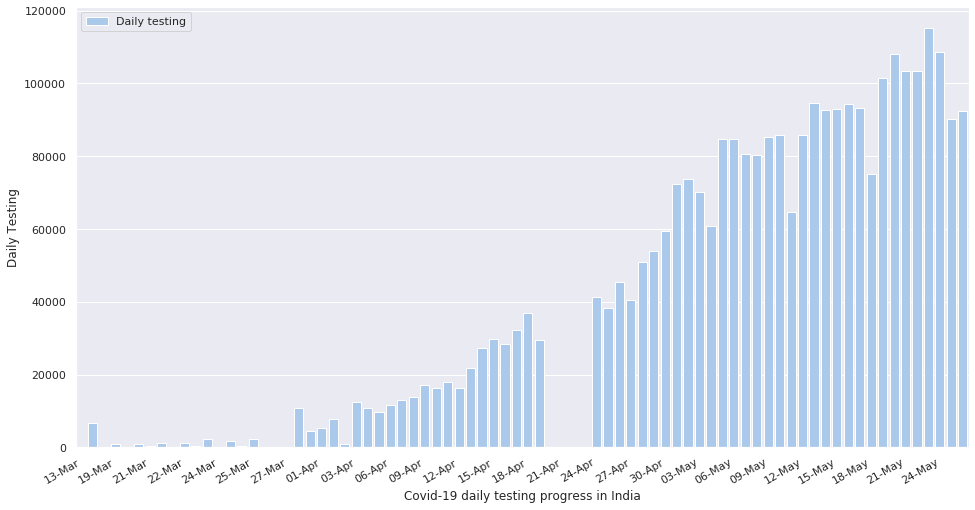

In [42]:

# Initialize the matplotlib figure
fig, axs = plt.subplots(figsize=(16, 9))

sns.set_color_codes("pastel")

# Plot testing data
sns.barplot(x=df_tested.updatetimestamp, y=df_tested.daily_tested, color='b', label='Daily testing')

# set the frequency for labelling the xaxis
freq = int(3)

# set the xlabels as the datetime data for the given labelling frequency,
# also use only the date for the label

dt = df_tested.iloc[::freq].updatetimestamp
dt = pd.to_datetime(dt).dt.strftime('%d-%b')
axs.set_xticklabels(dt)

# set the xticks at the same frequency as the xlabels
xtix = axs.get_xticks()
axs.set_xticks(xtix[::freq])

fig.autofmt_xdate()

# Add a legend and informative axis label
axs.legend(ncol=1, frameon=True, loc='upper left')
axs.set(ylabel="Daily Testing", xlabel= "Covid-19 daily testing progress in India")

plt.show()
fig.savefig('asset/testing.png')